In [23]:
versioninfo()

Julia Version 1.6.0
Commit f9720dc2eb* (2021-03-24 12:55 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: AMD EPYC 7702P 64-Core Processor
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, znver2)


In [24]:
mycommand = `pwd`
run(mycommand)

/home/kakizawa/kagome_xy/noneq/J2_-2.5e-3/L900


Process(`pwd`, ProcessExited(0))

In [25]:
using Interpolations
using Printf
using Optim
using PyPlot
using LinearAlgebra
using HDF5

In [26]:
function read_from_hdf5(h5file,obs_name,meas_interval)
	fid = h5open(h5file,"r")
	temps = fid["temperatures"][:]
	obs   = fid[obs_name*"/mean"]
	times = zeros(Int64,size(obs)[1])
    times[1] = 1
    for i in 2:size(obs)[1]
        times[i] = meas_interval * (i-1)
    end
    
	return temps,obs,times
end

read_from_hdf5 (generic function with 1 method)

In [27]:

function get_average_obs(num_split,obs_name,meas_interval)
    
    temps,obs,times = read_from_hdf5("2d_split1_out.h5",obs_name,meas_interval)
    num_temps = length(temps[:])
    m_data = zeros(Float64,length(times),num_temps)

    for i in 1:num_split
        ith_temps,ith_obs,ith_times = read_from_hdf5("2d_split$(i)_out.h5",obs_name,meas_interval)
        for j in 1:num_temps
            m_data[:,j] .+= ith_obs[:,j]
           
        end
        
    end
    
    for i in 1:num_temps
        m_data[:,i] ./= num_split
    end
    
    return temps,m_data,times
end

num_split = 5
obs_name = "m_120degs_corr"
meas_interval = 100
temps,m_data,times = get_average_obs(num_split,obs_name,meas_interval)


([0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08], [1.0 1.0 … 1.0 1.0; 0.28934266412671256 0.2856990405493279 … 0.24226547043257227 0.2357914456559337; … ; 0.13876949306541325 0.1503703700390991 … 0.09292068042602693 0.03405991516623212; 0.1388734960127908 0.15226876011911522 … 0.09357294017481224 0.03481643326682044], [1, 100, 200, 300, 400, 500, 600, 700, 800, 900  …  99100, 99200, 99300, 99400, 99500, 99600, 99700, 99800, 99900, 100000])

In [28]:
#comment out for the statistical estimation
h5file = "2d_out.h5"
obs_name = "m_120degs_corr"
meas_interval = 100
#temps,m_data,times = read_from_hdf5(h5file,obs_name,meas_interval)

100

In [29]:
for i in 1:num_temps
    println(temps[i])
end


0.07
0.071
0.072
0.073
0.074


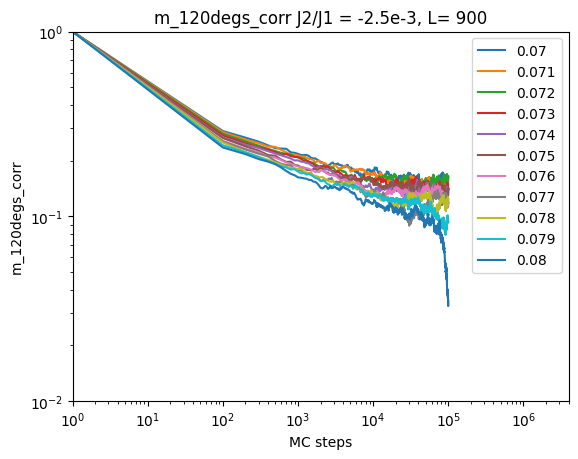

0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08


In [30]:
# cut too low temperature datas
num_temps = length(temps)
min_temp  = 1
max_temp  = num_temps
for it in min_temp:max_temp
	plt.semilogy(times,m_data[:,it],label="$(temps[it])")
end
plt.title("$(obs_name) J2/J1 = -2.5e-3, L= 900")
plt.xlabel("MC steps")
plt.ylabel("$(obs_name)")
plt.xscale("log")
plt.xlim(1,times[end]*40)
plt.ylim(1e-2,1)

plt.legend(loc="upper right")
plt.show()
for i in 1:num_temps
    println(temps[i])
end


In [31]:
#=
#load average data from text file
temps = [0.112,0.113,0.114,0.115,0.116]
file_idx = [3,4,5,6,7]
num_temps = length(temps)
mc_steps  = 20000 
m_data = Array{Float64}(undef,mc_steps,num_temps)
counter = 1
for ifl in file_idx
	open("mq_sqrt3_$(ifl).dat","r") do fp
		for is in 1:mc_steps
			str = split(readline(fp))
			m_data[is,counter] = parse(Float64,str[2])
		end
	end
	counter += 1
end
=#

In [32]:
m_data

1001×11 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  1.0       1.0        1.0
 0.289343  0.285699  0.280028  0.273826     0.251005  0.242265   0.235791
 0.266559  0.260356  0.254627  0.248905     0.222661  0.221789   0.217157
 0.253357  0.248818  0.241256  0.235942     0.210229  0.209103   0.204052
 0.242098  0.238677  0.231693  0.229813     0.202309  0.199425   0.19768
 0.233655  0.2377    0.225586  0.222801  …  0.195341  0.191906   0.191563
 0.232595  0.228632  0.220447  0.215517     0.190303  0.186627   0.183463
 0.231749  0.221958  0.21762   0.217152     0.185407  0.183594   0.175796
 0.221992  0.215267  0.216294  0.211709     0.182457  0.179262   0.169876
 0.220698  0.216202  0.210407  0.209665     0.182146  0.179823   0.166917
 0.217756  0.213782  0.208575  0.209024  …  0.179858  0.174592   0.162441
 0.21459   0.210684  0.206985  0.20428      0.181479  0.170727   0.161761
 0.214485  0.211048  0.205678  0.199621     0.175548  0.171534   0.160488
 ⋮                 

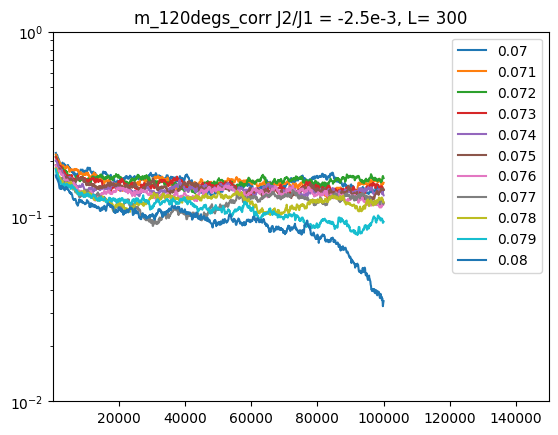

11


In [33]:
num_temps = length(temps)
println(num_temps)
for it in 1:num_temps
	plt.semilogy(times[10:end],m_data[:,it][10:end],label="$(temps[it])")
end
plt.title("$(obs_name) J2/J1 = -2.5e-3, L= 300")
#plt.xscale("log")
plt.xlim(1,times[end]*1.5)
plt.ylim(1e-2,1)
plt.legend(loc="upper right")
plt.show()

In [34]:
# reshape some datas for optimization.
min_temp = 7
max_temp = 11
temps  = temps[min_temp:max_temp]
num_temps = length(temps)
m_data = m_data[:,min_temp:max_temp]


1001×5 Matrix{Float64}:
 1.0       1.0       1.0       1.0        1.0
 0.256211  0.253924  0.251005  0.242265   0.235791
 0.231713  0.229937  0.222661  0.221789   0.217157
 0.222194  0.218185  0.210229  0.209103   0.204052
 0.210652  0.211112  0.202309  0.199425   0.19768
 0.207536  0.199001  0.195341  0.191906   0.191563
 0.201209  0.192472  0.190303  0.186627   0.183463
 0.195544  0.189376  0.185407  0.183594   0.175796
 0.19194   0.188405  0.182457  0.179262   0.169876
 0.1889    0.180927  0.182146  0.179823   0.166917
 0.185975  0.178344  0.179858  0.174592   0.162441
 0.185247  0.176814  0.181479  0.170727   0.161761
 0.181749  0.173057  0.175548  0.171534   0.160488
 ⋮                                        
 0.115243  0.116317  0.124594  0.0983207  0.0362047
 0.116416  0.117955  0.12381   0.0961659  0.0372886
 0.114479  0.117753  0.123282  0.0950814  0.0381464
 0.111744  0.121225  0.124584  0.0962082  0.0374414
 0.114109  0.12443   0.125716  0.0970826  0.0366598
 0.114347  0.125

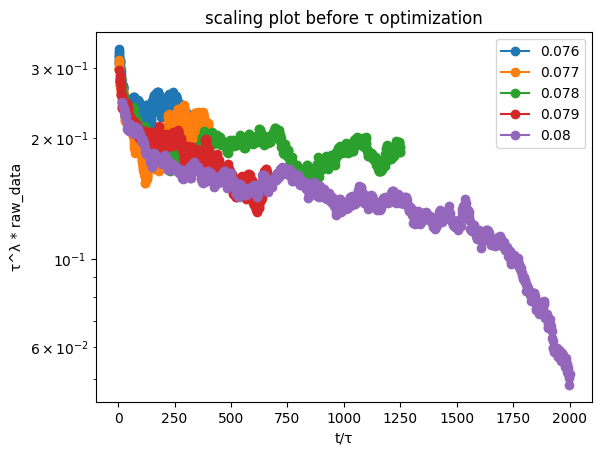

In [35]:
# search configuration of tau which put some curves on one curve.
taus   = [300.,250.,80.,150.,50.]
@assert length(taus) == max_temp - min_temp + 1
lambda = 0.1
start  = 10
plt.figure()
for it in 1:num_temps
	plt.semilogy(times[start:end] ./ taus[it],(taus[it]^lambda)*m_data[:,it][start:end],marker="o",label="$(temps[it])")
	
end
plt.title("scaling plot before τ optimization")
plt.xlabel("t/τ")
plt.ylabel("τ^λ * raw_data")
plt.legend(loc="upper right")
plt.show()

In [36]:
"""
params: [tau1, tau2, ...]
"""
newaxis = [CartesianIndex()]
function cost(params)
    taus = params
    nx_smpl = 10
    x_u = minimum(times[end] ./ taus)
    x_l = maximum(times[start] ./ taus)
    xs_smpl = range(x_l, x_u, length=nx_smpl)
    g_intpl = zeros((nx_smpl, length(temps)))
    for it in eachindex(temps)
        tau = taus[it]
        xs = times ./ tau
        g_data = tau^lambda * m_data[:, it]
        itp = LinearInterpolation(xs, g_data)        
        g_intpl[:, it] = itp.(xs_smpl)
    end
    g_mean = sum(g_intpl, dims=2) ./ length(temps)
    norm(g_intpl .- g_mean[:, newaxis])^2 /  norm(g_mean)^2
end

cost (generic function with 1 method)

In [37]:
res = Optim.optimize(cost, taus)
res

 * Status: success

 * Candidate solution
    Final objective value:     2.725523e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    213
    f(x) calls:    441


In [38]:
taus_opt = Optim.minimizer(res)

5-element Vector{Float64}:
 543.8836881758207
  81.78960533222217
  95.71880853593292
 135.86915849831368
  73.42436264546618

In [39]:
println("T τ")
for i in 1:num_temps 
	println(temps[i]," ",taus_opt[i])
end


T τ
0.076 543.8836881758207
0.077 81.78960533222217
0.078 95.71880853593292
0.079 135.86915849831368
0.08 73.42436264546618


In [40]:
function write_to_txt(file_name,temps,taus)
    open(file_name,"w") do fp
        println(fp,"# T τ")
        for it in 1:length(temps)
            println(fp,temps[it]," ",taus[it])
        end
    end
end

obs_name = split(obs_name,"_corr")[1]
write_to_txt(obs_name*"_tau.dat",temps,taus_opt)

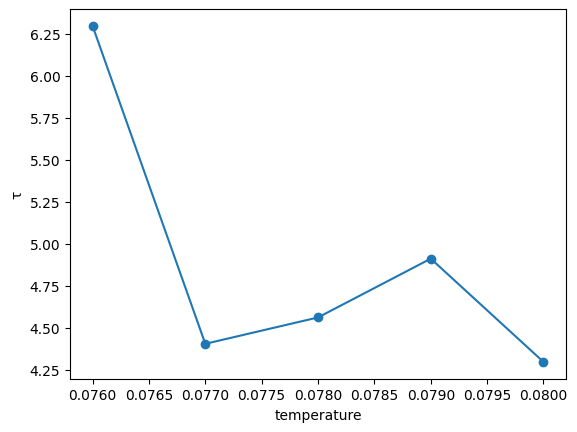

PyObject Text(24.000000000000007, 0.5, 'τ')

In [41]:
plt.plot(temps,log.(taus_opt),marker="o")
plt.xlabel("temperature")
plt.ylabel("τ")

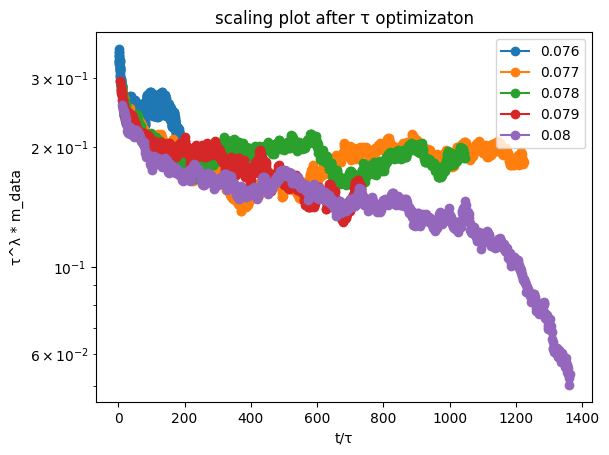

In [42]:
plt.figure()
for it in eachindex(temps)
	plt.semilogy(times[10:end] ./ taus_opt[it], (taus_opt[it]^lambda) * m_data[:, it][10:end], marker="o",label="$(temps[it])")
    #println((taus[it]^lambda) * m_data[:, it])
end
plt.title("scaling plot after τ optimizaton")
plt.xlabel("t/τ")
plt.ylabel("τ^λ * m_data")
plt.legend(loc="upper right")
plt.show()

In [43]:
x = 1.0
y = 0.9
n = 100
test = range(x,y,length=n)

1.0:-0.00101010101010101:0.9

In [44]:
test = LinRange(x,y,n)


100-element LinRange{Float64}:
 1.0,0.99899,0.99798,0.99697,0.99596,…,0.90404,0.90303,0.90202,0.90101,0.9